In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 10)

Populating the interactive namespace from numpy and matplotlib


In [80]:
data = pd.read_csv("data/sales_train_v2.csv")
data.head()
#data.shape

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>date</th>
      <th>date_block_num</th>
      <th>shop_id</th>
      <th>item_id</th>
      <th>item_price</th>
      <th>item_cnt_day</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>02.01.2013</td>
      <td>0</td>
      <td>59</td>
      <td>22154</td>
      <td>999.00</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>03.01.2013</td>
      <td>0</td>
      <td>25</td>
      <td>2552</td>
      <td>899.00</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>05.01.2013</td>
      <td>0</td>
      <td>25</td>
      <td>2552</td>
      <td>899.00</td>
      <td>-1.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>06.01.2013</td>
      <td>0</td>
      <td>25</td>
      <td>2554</td>
      <td>1709.05</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>15.01.2013</td>
      <td>0</td>
      <td>25</td>
      <td>2555</td>
      <td>1099.00</td>
      <td>1.0</td>
    </tr>
  </tbody>
</table>
</div>

In [3]:
data.describe()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>date_block_num</th>
      <th>shop_id</th>
      <th>item_id</th>
      <th>item_price</th>
      <th>item_cnt_day</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>2.935849e+06</td>
      <td>2.935849e+06</td>
      <td>2.935849e+06</td>
      <td>2.935849e+06</td>
      <td>2.935849e+06</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>1.456991e+01</td>
      <td>3.300173e+01</td>
      <td>1.019723e+04</td>
      <td>8.908532e+02</td>
      <td>1.242641e+00</td>
    </tr>
    <tr>
      <th>std</th>
      <td>9.422988e+00</td>
      <td>1.622697e+01</td>
      <td>6.324297e+03</td>
      <td>1.729800e+03</td>
      <td>2.618834e+00</td>
    </tr>
    <tr>
      <th>min</th>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>-1.000000e+00</td>
      <td>-2.200000e+01</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>7.000000e+00</td>
      <td>2.200000e+01</td>
      <td>4.476000e+03</td>
      <td>2.490000e+02</td>
      <td>1.000000e+00</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>1.400000e+01</td>
      <td>3.100000e+01</td>
      <td>9.343000e+03</td>
      <td>3.990000e+02</td>
      <td>1.000000e+00</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>2.300000e+01</td>
      <td>4.700000e+01</td>
      <td>1.568400e+04</td>
      <td>9.990000e+02</td>
      <td>1.000000e+00</td>
    </tr>
    <tr>
      <th>max</th>
      <td>3.300000e+01</td>
      <td>5.900000e+01</td>
      <td>2.216900e+04</td>
      <td>3.079800e+05</td>
      <td>2.169000e+03</td>
    </tr>
  </tbody>
</table>
</div>

In [38]:
data.isnull().sum(axis=0)
data.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [5]:
nunique = data.nunique()
nunique

date               1034
date_block_num       34
shop_id              60
item_id           21807
item_price        19993
item_cnt_day        198
dtype: int64

In [6]:
nunique.astype(float)/data.shape[0]

date              0.000352
date_block_num    0.000012
shop_id           0.000020
item_id           0.007428
item_price        0.006810
item_cnt_day      0.000067
dtype: float64

2013-12-28    9434
2013-12-29    9335
2014-12-30    9324
2013-12-30    9138
2014-12-31    8347
2014-12-27    8041
2013-12-31    7765
2013-02-23    7577
2014-12-28    7370
2013-12-21    6773
2013-01-02    6718
2014-12-29    6505
2013-02-22    6437
2014-02-22    6433
2014-12-20    6349
2013-01-03    6298
2013-12-27    6211
2014-01-02    6194
2013-03-08    6124
2013-12-22    6070
2013-03-23    5885
2015-01-02    5740
2013-03-16    5721
2013-02-16    5689
2013-02-09    5684
2014-12-21    5644
2013-01-04    5634
2013-12-14    5601
2013-12-26    5598
2013-03-02    5585
              ... 
2015-10-29    1405
2015-09-02    1401
2015-09-29    1393
2015-10-13    1389
2015-10-15    1374
2015-10-14    1372
2015-04-13    1362
2015-10-27    1361
2015-09-23    1356
2015-10-21    1335
2015-03-16    1334
2015-10-22    1332
2015-10-08    1328
2015-09-14    1304
2015-09-21    1297
2015-04-27    1278
2015-09-30    1252
2015-09-15    1243
2015-10-28    1238
2015-10-26    1224
2015-09-28    1223
2015-05-05  

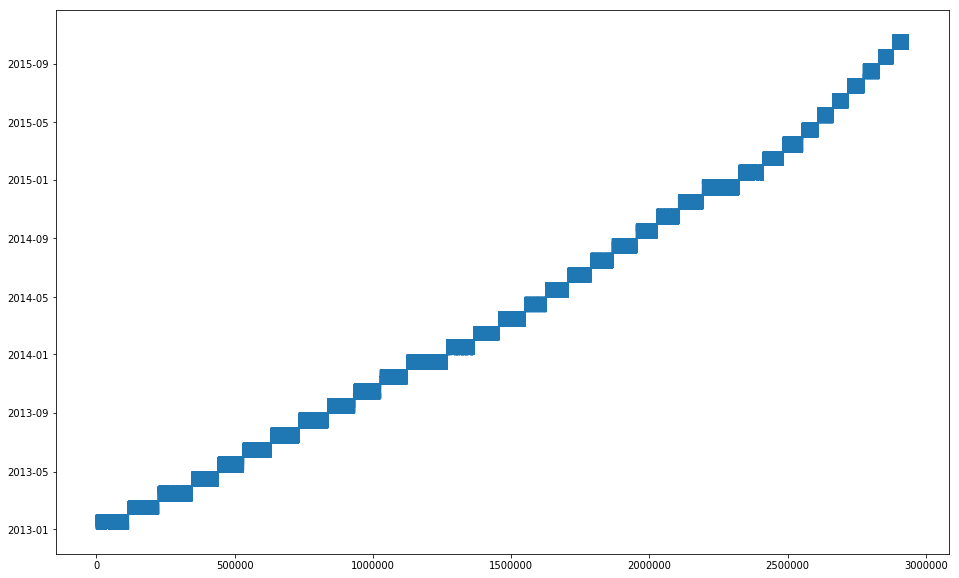

In [82]:
date = pd.to_datetime(data.date, format='%d.%m.%Y')
data.date = date
plt.plot(date)
unique_dates = date.value_counts()
unique_dates

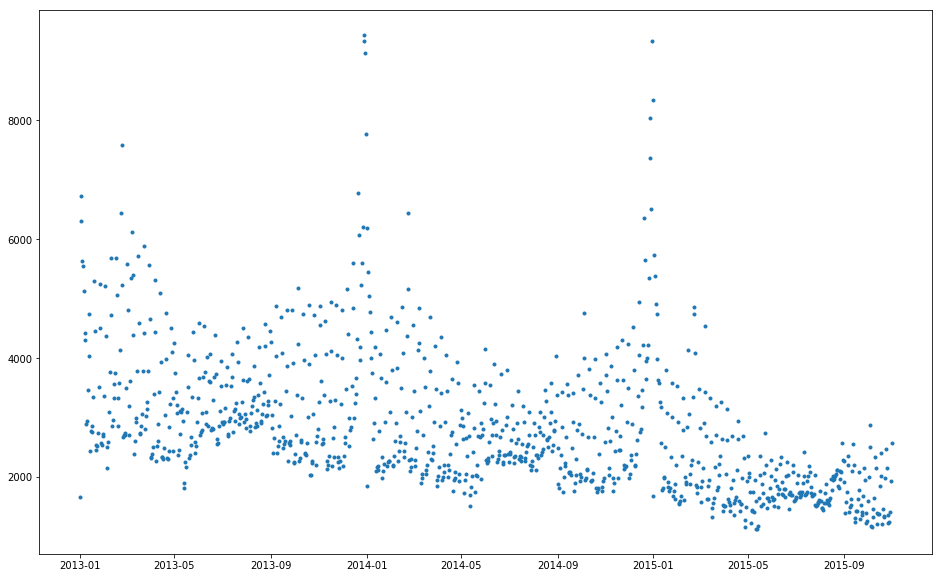

In [14]:
plt.plot(unique_dates, '.')

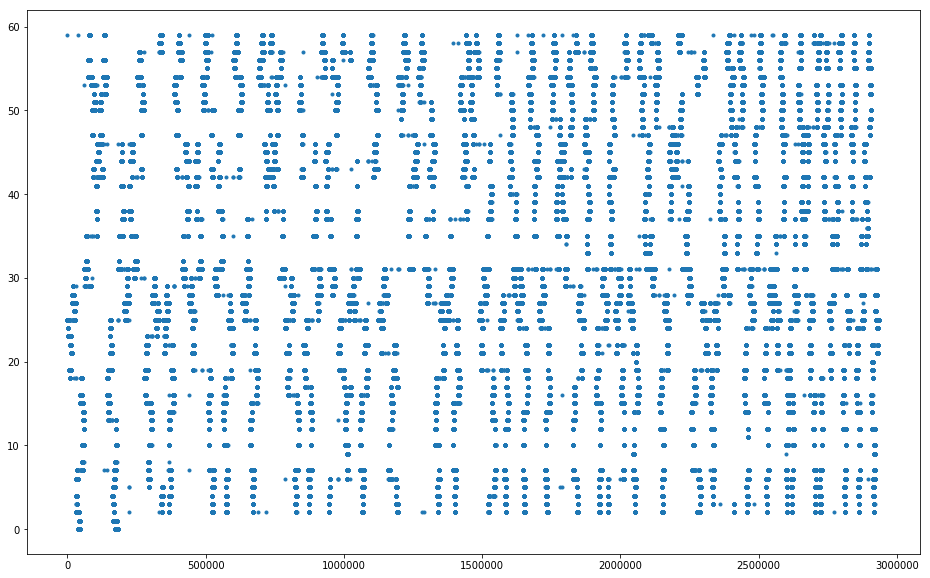

In [37]:
data.shop_id.value_counts()
plt.plot(data.shop_id, '.')

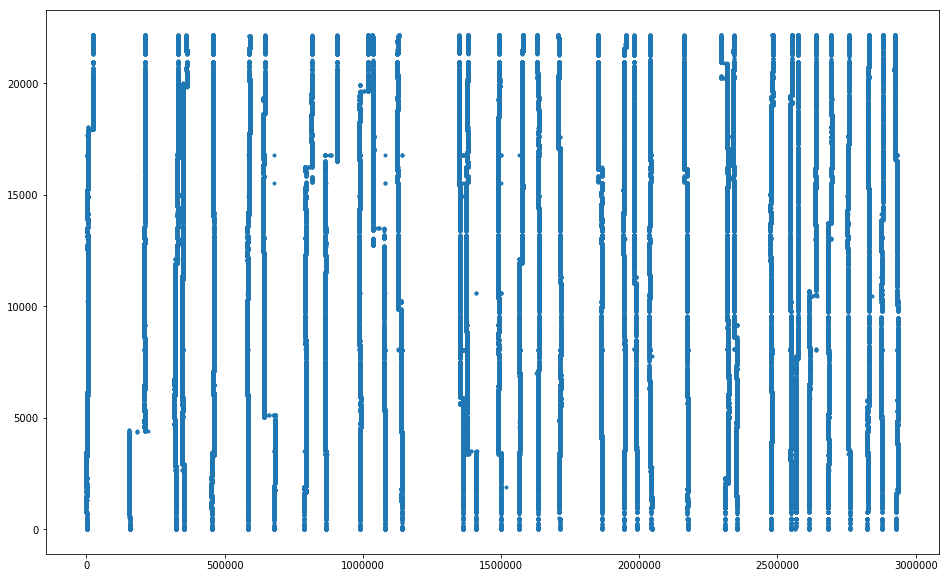

In [47]:
#data.item_id.value_counts().value_counts().plot(logy=True, logx=True)
plt.plot(data.item_id[data.shop_id == data.shop_id[1]], '.')

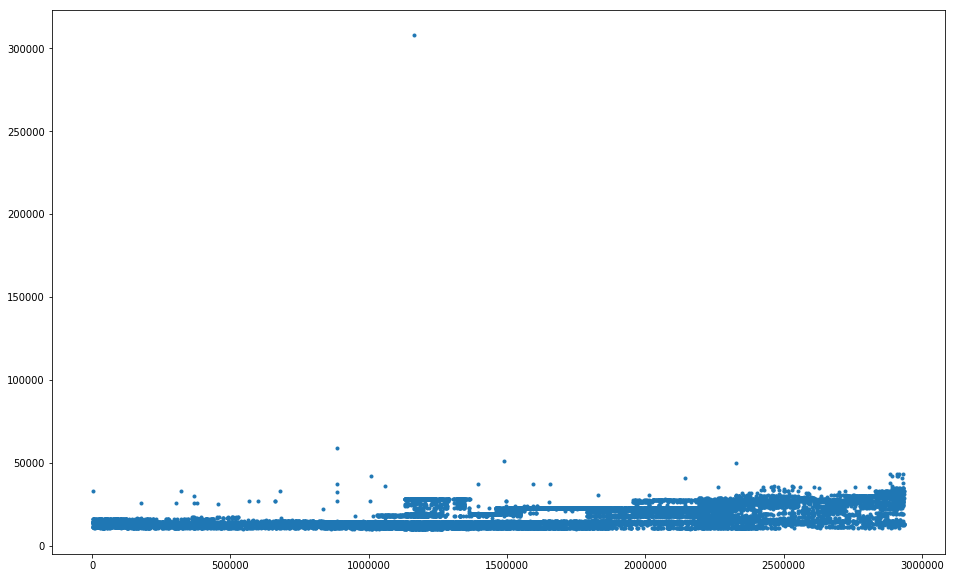

In [35]:
plt.plot(data.item_price[data.item_price > 10000], '.')

6    82663
7    58076
4    38242
5    38179
2    25991
3    25532
0     9857
1     5678
9     3751
8     3412
Name: shop_id, dtype: int64

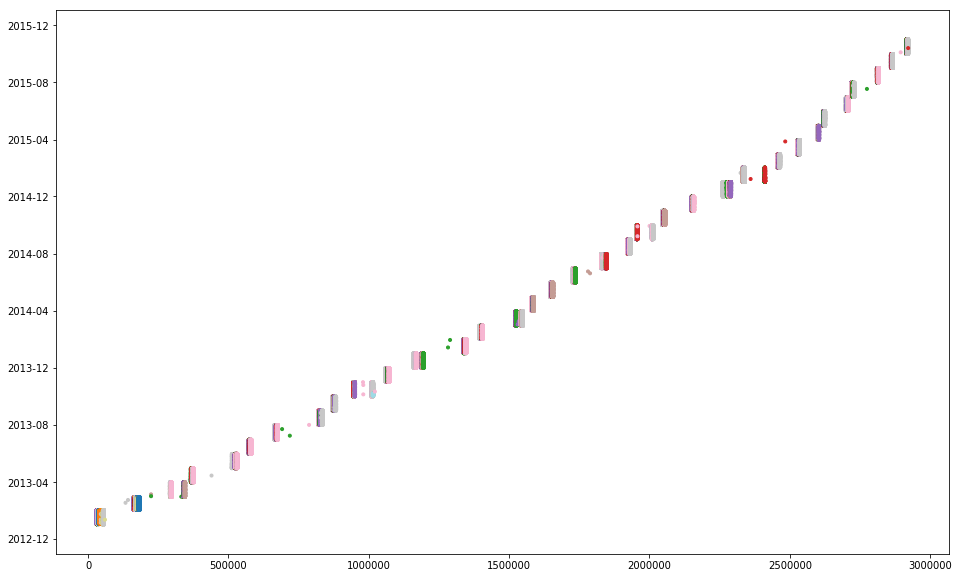

In [96]:
d = data[1:]
d = d[d.shop_id < 10]
#d = d[d.shop_id == 23]
plt.scatter(d.index.values, [x for x in d.date], c=(d.shop_id - np.min(d.shop_id)), cmap='tab20', marker='.')
#plt.plot((d.shop_id - np.min(d.shop_id))[1:])
d.shop_id.value_counts()